Implementing Industry Applications
--

Recipe 6.1. Consumer complaint classification
--
In this section, we are going to implement end-to-end solutions for 
"Consumer complaint classification" using NLP.

Implementing Multiclass Classification
--
Let’s understand how to do multiclass classification for text data in Python
through solving Consumer complaint classifications for the finance
industry.

Problem
--
Each week the Consumer Financial Protection Bureau sends thousands of consumers’ complaints about financial products and services to companies for a response. Classify those consumer complaints into the product category it belongs to using the description of the complaint.

Solution
--
The goal of the project is to classify the complaint into a specific product
category. Since it has multiple categories, it becomes a multiclass
classification that can be solved through many of the machine learning
algorithms.

Once the algorithm is in place, whenever there is a new complaint,
we can easily categorize it and can then be redirected to the concerned
person. This will save a lot of time because we are minimizing the human
intervention to decide whom this complaint should go to.

In [1]:
# Importing all the libraries:
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing,linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

In [2]:
# Importing the data
# Import the data that was downloaded in the last step:
Data = pd.read_csv("C:\Program Files\Python36\suven\Adv ML\datasets\datasets/Consumer_Complaints.csv",encoding='latin-1')

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


![dtypes_consumer_complaints](images/dtypes_consumer_complaints.png 'dtypes_consumer_complaints')

In [3]:
# Selecting required columns and rows
Data = Data[['product', 'consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]

# See top 5 rows
Data.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [5]:
# Factorizing the product-category column

Data['category_id']=Data['product'].factorize()[0]
Data.head()

,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [6]:
# Check the distriution of complaints by category

Data.groupby('product').product.count()
# or
# Data.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: product, dtype: int64

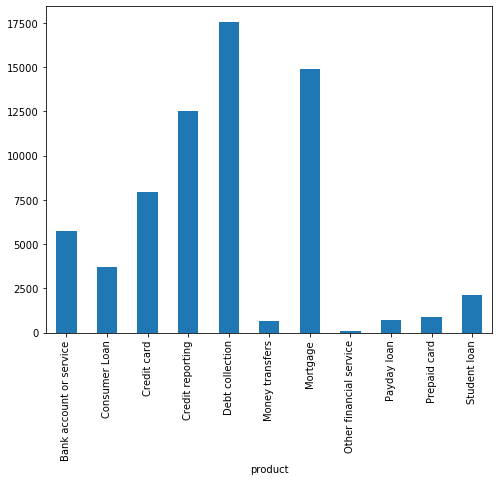

In [7]:
# Lets plot it and see
fig = plt.figure(figsize=(8,6))
Data.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [8]:
# Splitting the data
# Split the data into train and validation:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Data['consumer_complaint_narrative'], Data['product'])

In [9]:
# Feature engineering using TF-IDF
# Create TF-IDF vectors as we discussed in Chapter (or Part) 4. 

# Here we consider maximum features to be 5000.
## type your code here
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.transform(valid_y)

#print(train_y[:5])  # for checking purpose
#print(valid_y[:5])  # for checking purpose

tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Data['consumer_complaint_narrative'])

xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

print(xtrain_tfidf[:10])

  (0, 4967)	0.025273849658055375
  (0, 4951)	0.1348521753035859
  (0, 4948)	0.11654266143831209
  (0, 4840)	0.14302799075988606
  (0, 4836)	0.09189444497925928
  (0, 4720)	0.07808239819996227
  (0, 4616)	0.08586858748629866
  (0, 4537)	0.07672391868399073
  (0, 4528)	0.1430151176723648
  (0, 4517)	0.04919353537943894
  (0, 4486)	0.030683510132641825
  (0, 4475)	0.06130612648149372
  (0, 4469)	0.05283969175417146
  (0, 4464)	0.04961982237950218
  (0, 4462)	0.14667905316109556
  (0, 4460)	0.1147722013462626
  (0, 4404)	0.1005725881354556
  (0, 4185)	0.29365502550574174
  (0, 4110)	0.15331289776571777
  (0, 4079)	0.0825257907188519
  (0, 3867)	0.17700978769519582
  (0, 3534)	0.08914242243029645
  (0, 3385)	0.11413618223001747
  (0, 3214)	0.08858965240934806
  (0, 3145)	0.05649092265872303
  :	:
  (9, 1860)	0.07929689685764214
  (9, 1568)	0.07371889961149936
  (9, 1564)	0.16229161870601155
  (9, 1539)	0.07973508152961065
  (9, 1350)	0.1054513671024582
  (9, 1331)	0.06028603918597776
  (9, 

In [10]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)
# Model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr',
n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf),valid_y)
print ("Accuracy: ", accuracy)

Accuracy:  0.8452281163932464


c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
# Classification report
print(metrics.classification_report(valid_y, model.predict(xvalid_tfidf),
                                    target_names=Data['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.81      0.79      0.80      1447
          Consumer Loan       0.77      0.55      0.65       900
               Mortgage       0.79      0.82      0.81      1971
            Credit card       0.85      0.85      0.85      3123
       Credit reporting       0.82      0.90      0.85      4319
           Student loan       0.78      0.46      0.58       169
Bank account or service       0.92      0.95      0.93      3805
            Payday loan       0.00      0.00      0.00        29
        Money transfers       0.67      0.29      0.41       193
Other financial service       0.78      0.57      0.66       210
           Prepaid card       0.92      0.76      0.84       536

              micro avg       0.84      0.84      0.84     16702
              macro avg       0.74      0.63      0.67     16702
           weighted avg       0.84      0.84      0.84     16702



c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


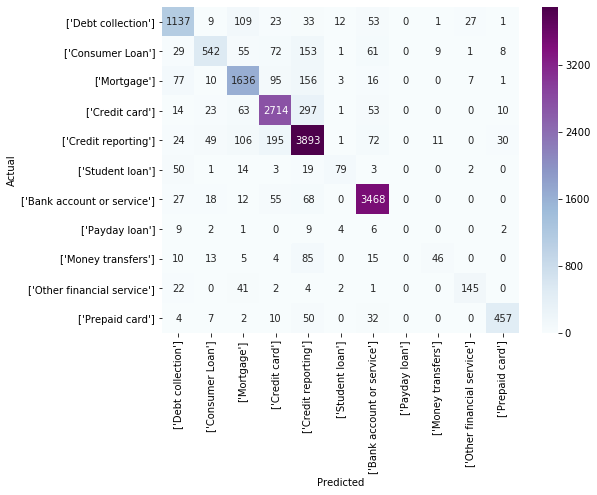

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, model.predict(xvalid_tfidf))

# Vizualizing confusion matrix
category_id_df = Data[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)

id_to_category = dict(category_id_df[['category_id','product']].values)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu", 
            xticklabels=category_id_df[['product']].values, 
            yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Recommended reading 
https://www.absentdata.com/python-graphs/create-a-heat-map-with-seaborn/

The accuracy of 84% is good for a baseline model. Precision and recall
look pretty good across the categories except for “Payday loan.” If you look
for Payload loan, most of the wrong predictions are Debt collection and
Credit card, which might be because of the smaller number of samples in
that category. It also sounds like it’s a subcategory of a credit card. 

We can add these samples to any other group to make the model more stable.

Let’s see what prediction looks like for one example.

In [13]:
# Prediction example
# texts = ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA. I do not believe this debt is mine."]

# type your code here

# Prediction example
texts = ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA. I do not believe this debt is mine."]

text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
print(texts)

# id_to_category -> is defined above
#print(" - Predicted as: '{}'".format(predictions[0]))
print(" - Predicted as: '{}'".format(id_to_category[predictions[0]]))



['This company refuses to provide me verification and validation of debtper my right under the FDCPA. I do not believe this debt is mine.']
 - Predicted as: 'Credit reporting'


In [14]:
texts = ["My credit card has been stolen and i want credit card cancelled"]

text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
print(texts)

# id_to_category -> is defined above
#print(" - Predicted as: '{}'".format(predictions[0]))
print(" - Predicted as: '{}'".format(id_to_category[predictions[0]]))


['My credit card has been stolen and i want credit card cancelled']
 - Predicted as: 'Mortgage'
